# Text Classification with PySpark

In [1]:
from pyspark import SparkContext

In [2]:
sc = SparkContext(master="local[2]")

In [3]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName("TextClassifierwithPySpark").getOrCreate()

In [8]:
df = spark.read.csv("data/udemy_courses_clean.csv",header=True,inferSchema=True)

In [10]:
df.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

In [11]:
df.columns

['_c0',
 'course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject',
 'clean_course_title']

In [12]:
df.select('course_title','subject').show()

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
|Trading Penny Sto...|Business Finance|
|Investing And Tra...|Business Finance|
|Trading Stock Cha...|Business Finance|
|Options Trading 3...|Business Finance|
|The Only Investme...|Business Finance|
|Forex Trading Sec...|Business Finance|
|Trading Options W...|Business Finance|
|Financial Managem...|Business Finance|
|Forex Trading Cou...|Business Finance|
|Python Algo Tradi...|Business Finance|
|Short Selling: Le...|Business Finance|
|Basic Technical A...|Business Finance|
|The Complete Char...|Business Finance|
|7 Deadly Mistakes...|Business Finance|
|Financial Stateme...|Business Finance|
+--------------------+----------------+
only showing top 20 rows



In [13]:
df = df.select('course_title','subject')

In [14]:
df.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



In [15]:
df.groupBy('subject').count().show()

+--------------------+-----+
|             subject|count|
+--------------------+-----+
|play Electric Gui...|    1|
|Multiply returns ...|    1|
|                null|    6|
|    Business Finance| 1198|
|Introduction Guit...|    1|
|Learn Play Fernan...|    1|
|      Graphic Design|  603|
|Aprende tocar el ...|    1|
|     Web Development| 1200|
|Learn Classical G...|    1|
| Musical Instruments|  676|
+--------------------+-----+



In [16]:
df.toPandas()['subject'].value_counts()

Web Development                                                                                                                                                                                              1200
Business Finance                                                                                                                                                                                             1198
Musical Instruments                                                                                                                                                                                           676
Graphic Design                                                                                                                                                                                                603
Multiply returns Value Investinghttpswwwudemycommultiplyyourreturnsusingvalueinvestingtrue2019421963All Levels45 hours20150723T000833Z 874284Weekly Forex Analys

In [17]:
# Check For Missing Values
df.toPandas()['subject'].isnull().sum()

6

In [18]:
# Drop Missing Values
df = df.dropna(subset=('subject'))

In [19]:
# Check For Missing Values
df.toPandas()['subject'].isnull().sum()

0

In [20]:
import pyspark.ml.feature

In [21]:
dir(pyspark.ml.feature)

['Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'ElementwiseProduct',
 'FeatureHasher',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'PCA',
 'PCAModel',
 'Param',
 'Params',
 'PolynomialExpansion',
 'QuantileDiscretizer',
 'RFormula',
 'RFormulaModel',
 'RegexTokenizer',
 'R

In [22]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer

In [23]:
df.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



In [24]:
# Stages For the Pipeline
tokenizer = Tokenizer(inputCol='course_title',outputCol='mytokens')
# remove uimportant words ( this, that...)
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')



In [25]:
# LabelEncoding/LabelIndexing
labelEncoder = StringIndexer(inputCol='subject',outputCol='label').fit(df)

In [26]:
labelEncoder.transform(df).show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [27]:
labelEncoder.labels

['Web Development',
 'Business Finance',
 'Musical Instruments',
 'Graphic Design',
 'Aprende tocar el Acorden de odo con tcnicahttpswwwudemycomaprendeatocarelacordeondeoidoycontecnicatrue25932134Beginner Level4 hours20140916T195145Z 263432Aprende los Secretos de la Armnica con HARPSOUL',
 'Introduction Guitar A Course Beginnershttpswwwudemycomintroductiontoguitartrue251631156Beginner Level25 hours20141030T155939Z 650804Guitar Master Class Learning Play Guitar Z',
 'Learn Classical Guitar Technique play Spanish Romancehttpswwwudemycomguitartechniquestrue19513164643All Levels5 hours20131118T175959Z 265888Learn Guitar Worship Learn 4 Songs unlock 1',
 'Learn Play Fernando Sors Study B minorhttpswwwudemycomstudyinbminortrue115140359Intermediate Level43 mins20140127T205816Z 398746Piano Chord Based System  Learn Play Pros Do',
 'Multiply returns Value Investinghttpswwwudemycommultiplyyourreturnsusingvalueinvestingtrue2019421963All Levels45 hours20150723T000833Z 874284Weekly Forex Analysis B

In [28]:
label_dict = {'Web Development':0.0,
 'Business Finance':1.0,
 'Musical Instruments':2.0,
 'Graphic Design':3.0}

In [29]:
df.show()

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
|Trading Penny Sto...|Business Finance|
|Investing And Tra...|Business Finance|
|Trading Stock Cha...|Business Finance|
|Options Trading 3...|Business Finance|
|The Only Investme...|Business Finance|
|Forex Trading Sec...|Business Finance|
|Trading Options W...|Business Finance|
|Financial Managem...|Business Finance|
|Forex Trading Cou...|Business Finance|
|Python Algo Tradi...|Business Finance|
|Short Selling: Le...|Business Finance|
|Basic Technical A...|Business Finance|
|The Complete Char...|Business Finance|
|7 Deadly Mistakes...|Business Finance|
|Financial Stateme...|Business Finance|
+--------------------+----------------+
only showing top 20 rows



In [30]:
df = labelEncoder.transform(df)

In [31]:
df.show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [32]:
### Split Dataset 70% for training / 30% for testing
(trainDF,testDF) = df.randomSplit((0.7,0.3),seed=42)

In [33]:
trainDF.show()

+--------------------+--------------------+-----+
|        course_title|             subject|label|
+--------------------+--------------------+-----+
|#1 Piano Hand Coo...| Musical Instruments|  2.0|
|#10 Hand Coordina...| Musical Instruments|  2.0|
|#4 Piano Hand Coo...| Musical Instruments|  2.0|
|#5  Piano Hand Co...| Musical Instruments|  2.0|
|#6 Piano Hand Coo...| Musical Instruments|  2.0|
|'Geometry Of Chan...|    Business Finance|  1.0|
|              000!""|Learn Classical G...|  6.0|
|1 - Concepts of S...|    Business Finance|  1.0|
|          1 Hour CSS|     Web Development|  0.0|
|1. Principles of ...|    Business Finance|  1.0|
|10 Numbers Every ...|    Business Finance|  1.0|
|10.  Bonds and Bo...|    Business Finance|  1.0|
|101 Blues riffs -...| Musical Instruments|  2.0|
|15 Mandamientos p...|    Business Finance|  1.0|
|17 Complete JavaS...|     Web Development|  0.0|
|188% Profit in 1Y...|    Business Finance|  1.0|
|2 Easy Steps To I...|    Business Finance|  1.0|


In [34]:
### Estimator
from pyspark.ml.classification import LogisticRegression

In [35]:
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')

##  Building the Pipeline


In [36]:
from pyspark.ml import Pipeline

In [37]:
pipeline = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,lr])

In [38]:
pipeline

Pipeline_6f86713a3967

In [39]:
pipeline.stages

Param(parent='Pipeline_6f86713a3967', name='stages', doc='a list of pipeline stages')

In [40]:
# Building MOdel
lr_model = pipeline.fit(trainDF)

In [41]:
lr_model

PipelineModel_2ae2bebfb215

In [42]:
# Predictions on our Test Dataset
predictions = lr_model.transform(testDF)

In [43]:
predictions.show()

+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title|            subject|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|#12 Hand Coordina...|Musical Instruments|  2.0|[#12, hand, coord...|[#12, hand, coord...|(3670,[394,491,60...|(3670,[394,491,60...|[5.54102657084344...|[0.28268355884799...|       2.0|
|#7 Piano Hand Coo...|Musical Instruments|  2.0|[#7, piano, hand,...|[#7, piano, hand,...|(3670,[9,13,60,23...|(3670,[9,13,60,23...|[-6.0823322911294...|[1.03215808625497...|       2.0|
|'Greensleeves' Cr...|Musical Instruments|  2.0|['greensleeves', ...|[

In [44]:
# Select Columns
predictions.columns

['course_title',
 'subject',
 'label',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [45]:
predictions.select('rawPrediction','probability','subject','label','prediction').show(10)

+--------------------+--------------------+-------------------+-----+----------+
|       rawPrediction|         probability|            subject|label|prediction|
+--------------------+--------------------+-------------------+-----+----------+
|[5.54102657084344...|[0.28268355884799...|Musical Instruments|  2.0|       2.0|
|[-6.0823322911294...|[1.03215808625497...|Musical Instruments|  2.0|       2.0|
|[-1.0421312509514...|[1.23270089171255...|Musical Instruments|  2.0|       2.0|
|[-2.8211817264969...|[4.77760514505753...|   Business Finance|  1.0|       1.0|
|[21.7088196949552...|[0.99999998997280...|    Web Development|  0.0|       0.0|
|[20.0054038054061...|[0.99999996031555...|    Web Development|  0.0|       0.0|
|[18.0923732215371...|[0.99999972290786...|    Web Development|  0.0|       0.0|
|[-8.4472424796447...|[4.30624170511669...|Musical Instruments|  2.0|       2.0|
|[-24.070755044105...|[7.95180495683633...|     Graphic Design|  3.0|       3.0|
|[-6.0537484583003...|[8.425

In [46]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [47]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

In [48]:
accuracy = evaluator.evaluate(predictions)
accuracy

0.9173003802281369

In [49]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [50]:
y_true = predictions.select('label')
y_true = y_true.toPandas()
y_pred = predictions.select('prediction')
y_pred = y_pred.toPandas()

In [51]:
from sklearn.metrics import confusion_matrix,classification_report

In [52]:
cm = confusion_matrix(y_true,y_pred)
cm

array([[321,  10,   1,   4,   0,   0],
       [  9, 340,   1,   1,   0,   0],
       [  6,  15, 156,   1,   0,   0],
       [  8,  23,   6, 148,   0,   0],
       [  0,   1,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0]], dtype=int64)

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [54]:
label_dict.keys()

dict_keys(['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design'])

In [55]:
class_names = ['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design','N4','N5']

Confusion matrix, without normalization
[[321  10   1   4   0   0]
 [  9 340   1   1   0   0]
 [  6  15 156   1   0   0]
 [  8  23   6 148   0   0]
 [  0   1   0   0   0   0]
 [  0   1   0   0   0   0]]


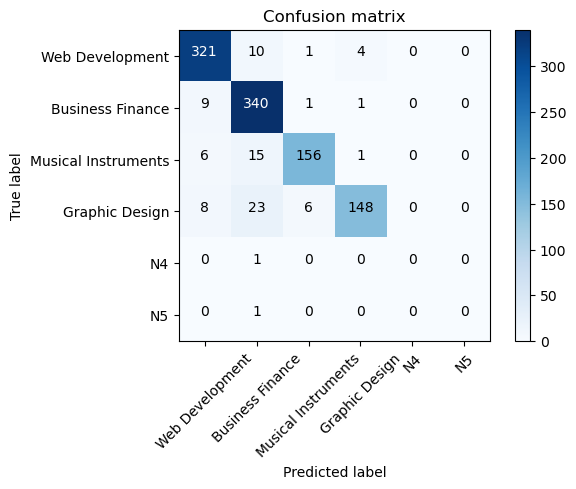

In [56]:
plot_confusion_matrix(cm,class_names)

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Classication Report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       336
         1.0       0.87      0.97      0.92       351
         2.0       0.95      0.88      0.91       178
         3.0       0.96      0.80      0.87       185
         5.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1

    accuracy                           0.92      1052
   macro avg       0.62      0.60      0.61      1052
weighted avg       0.92      0.92      0.92      1052



In [59]:
# Classication Report
print(classification_report(y_true,y_pred,target_names=class_names))

                     precision    recall  f1-score   support

    Web Development       0.93      0.96      0.94       336
   Business Finance       0.87      0.97      0.92       351
Musical Instruments       0.95      0.88      0.91       178
     Graphic Design       0.96      0.80      0.87       185
                 N4       0.00      0.00      0.00         1
                 N5       0.00      0.00      0.00         1

           accuracy                           0.92      1052
          macro avg       0.62      0.60      0.61      1052
       weighted avg       0.92      0.92      0.92      1052



In [60]:
class_temp = predictions.select("label").groupBy("label").count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
# # # print(class_name)
class_names

### Making Single Prediction
+ sample as DF
+ apply pipeline

In [61]:
from pyspark.sql.types import StringType

In [63]:
ex1 = spark.read.csv("data/Classeur1.csv",header=True,inferSchema=True)
ex1.show(truncate=False)

+--------------------------------------+
|course_title                          |
+--------------------------------------+
|how to be a good business man         |
|Create ur graphic interface in 10 days|
|JavaScript basic                      |
|trading master                        |
+--------------------------------------+



In [64]:
pred_ex1 = lr_model.transform(ex1)

In [65]:
pred_ex1.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|how to be a good ...|[how, to, be, a, ...|[good, business, ...|(3670,[53,2144],[...|(3670,[53,2144],[...|[1.51273947444961...|[7.81464371795549...|       1.0|
|Create ur graphic...|[create, ur, grap...|[create, ur, grap...|(3670,[14,90,134,...|(3670,[14,90,134,...|[-2.8701787722123...|[2.37250737756951...|       3.0|
|    JavaScript basic| [javascript, basic]| [javascript, basic]|(3670,[18,81],[1....|(3670,[18,81],[3....|[21.0993745477635...|[0.99999999180665...|       0.0|
|      trading master|   [trading, maste

In [66]:
pred_ex1.columns

['course_title',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [67]:
pred_ex1.select('course_title','rawPrediction','probability','prediction').show()

+--------------------+--------------------+--------------------+----------+
|        course_title|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|how to be a good ...|[1.51273947444961...|[7.81464371795549...|       1.0|
|Create ur graphic...|[-2.8701787722123...|[2.37250737756951...|       3.0|
|    JavaScript basic|[21.0993745477635...|[0.99999999180665...|       0.0|
|      trading master|[-1.7200416162825...|[3.62875155250914...|       1.0|
+--------------------+--------------------+--------------------+----------+



In [68]:
label_dict

{'Web Development': 0.0,
 'Business Finance': 1.0,
 'Musical Instruments': 2.0,
 'Graphic Design': 3.0}